In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx as nx
import scipy
import pickle
%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import irlb_copy as irl 

# import

In [61]:
human_ppi_mat = scipy.sparse.load_npz('data/adj_matrix_sparse_restricted_9606.npz')
max_degree =  np.max(human_ppi_mat)
human_ppi_mat /= max_degree

### irlb test

In [10]:
k = 100
A = human_ppi_mat

In [22]:
%%time

svd_out = irl.irlb(A, k)

CPU times: user 7min 7s, sys: 23.2 s, total: 7min 30s
Wall time: 18.8 s


In [19]:
%%time 

scipy_svd_out = scipy.sparse.linalg.svds(A, solver='arpack', k=k, return_singular_vectors=False)

CPU times: user 2min 34s, sys: 8.41 s, total: 2min 42s
Wall time: 7.06 s


In [ ]:
%%timeit

scipy_svd_out = scipy.sparse.linalg.svds(A, solver='arpack', k=k, return_singular_vectors=False)

# try sparseSVD package

In [24]:
!pip install cython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.5 MB/s eta 0:00:0000:0100:01


In [45]:
# !pip install sparsesvd

In [23]:
import sparsesvd

ModuleNotFoundError: No module named 'sparsesvd'

# Randomized SVD

In [30]:
type(human_ppi_mat)

scipy.sparse._csr.csr_matrix

In [34]:
human_ppi_mat.nnz / 1e6

5.963604

# Facebook randomized SVD

In [35]:
!pip install fbpca

  Preparing metadata (setup.py) ... done
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=56e702c295fe91a6c4fafd6f9b577459d4bd74623f85c14a67b9c103253e5e8e
  Stored in directory: /home/akhil/.cache/pip/wheels/80/d9/aa/106e3ec6ae78430182dfdefe59fe52138364236e7134304357
Successfully built fbpca


In [62]:
import fbpca

In [44]:
%%timeit
U, S, Va = fbpca.pca(human_ppi_mat, k=k)

3 s ± 26.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%%timeit

scipy_svd_out = scipy.sparse.linalg.svds(A, solver='arpack', k=k, return_singular_vectors=False)

7.08 s ± 44.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [63]:
%%time

# using self-adjointness
fbpca.eigens(A, k=k)

CPU times: user 20.5 s, sys: 1.04 s, total: 21.5 s
Wall time: 3.18 s


(array([254.44138005, 175.52968706, 129.4738252 , 122.16332671,
        105.86656611,  96.21514265,  94.10084978,  90.3070429 ,
         83.16983609,  81.68251139,  75.39113856,  72.44835093,
         68.42526586,  66.56185454,  63.58826214,  60.99717434,
         59.5244414 ,  57.46697226,  54.81982983,  51.6274294 ,
         51.17220314,  50.57527678,  49.40931352,  49.31549597,
         48.46786304,  46.45787358,  46.24026798,  45.63916978,
         45.52522629,  44.50203642,  43.63930437,  42.91522996,
         41.94492949,  40.94553433,  40.23212097,  39.91904084,
         39.40793748,  39.33828237,  38.94198342,  37.7988297 ,
         37.48181052,  36.92587924,  36.22081046,  36.11744284,
         35.64122072,  34.97093409,  34.77924893,  34.73225039,
         33.72502205,  33.55770923,  33.09956167,  32.84650298,
         32.73554599,  31.93568406,  31.68200548,  31.49443982,
         31.40429903,  30.7778161 ,  30.65637574,  30.00889106,
         29.92018014,  29.36049183,  29.

In [64]:
%%time

fbpca.eigens(A, k=k, n_iter=10)

CPU times: user 40.1 s, sys: 1.68 s, total: 41.8 s
Wall time: 5.35 s


(array([254.44138008, 175.52968778, 129.47383594, 122.16335929,
        105.86666657,  96.21529262,  94.1009888 ,  90.30722477,
         83.17067117,  81.68316981,  75.3927122 ,  72.4497942 ,
         68.42870155,  66.56489016,  63.59520225,  61.0048704 ,
         59.53058496,  57.48265082,  54.84214993,  51.65510296,
         51.22361349,  50.61475549,  49.46949849,  49.35445714,
         48.50391778,  46.51603031,  46.28164243,  45.71780365,
         45.61354768,  44.5856923 ,  43.7347883 ,  43.07018992,
         42.09876439,  41.17073178,  40.44434956,  40.04924481,
         39.65766084,  39.49144641,  39.28652314,  38.18536173,
         37.92001354,  37.2502907 ,  36.59259904,  36.44631735,
         36.06294264,  35.40717778,  35.37037883,  35.20131517,
         34.45413614,  34.22102341,  33.81365476,  33.58584577,
         33.48219212, -33.16250738,  32.84799921,  32.79053701,
         32.61703144,  32.0670668 ,  31.94663147,  31.57713945,
         31.44791458,  31.08193105,  30.

In [65]:
%%time
U, S, Va = fbpca.pca(human_ppi_mat, k=k, n_iter=10)

CPU times: user 1min 47s, sys: 5.97 s, total: 1min 53s
Wall time: 10.4 s


In [66]:
%%time
U, S, Va = fbpca.pca(human_ppi_mat, k=k, n_iter=5)

CPU times: user 57.5 s, sys: 3 s, total: 1min
Wall time: 5.59 s


In [67]:
S

array([189.04030035, 175.38754131, 129.35402059, 116.48476077,
       105.65116348,  95.87376826,  94.0839966 ,  90.2786064 ,
        82.92988385,  80.87816565,  75.19373812,  70.71474439,
        68.0349467 ,  66.56116928,  63.39485531,  60.46248975,
        57.75152559,  56.36220383,  54.83268806,  51.65364375,
        50.72656542,  50.28605703,  49.45190722,  49.25483225,
        48.4931358 ,  46.30294217,  46.25556396,  45.71426767,
        45.1236646 ,  44.34684542,  43.49146869,  42.61054901,
        42.05030622,  41.07068658,  40.40089097,  39.79219451,
        39.64741807,  39.45485639,  38.64221254,  38.09373819,
        37.89731758,  37.23028783,  36.56531163,  36.43730205,
        35.65720142,  35.40117659,  35.36984647,  35.20155737,
        34.45463322,  34.1496828 ,  33.80546557,  33.53527839,
        33.44686943,  32.90479573,  32.84867571,  32.64836857,
        32.2628024 ,  32.05089201,  31.58429687,  31.55917556,
        31.462519  ,  31.05900664,  30.8515358 ,  30.77

In [68]:
scipy_svd_out = scipy.sparse.linalg.svds(A, solver='arpack', k=k, return_singular_vectors=False)

In [69]:
scipy_svd_out

array([ 24.82380048,  24.94248996,  25.06465903,  25.30332024,
        25.46286377,  25.64148046,  25.68480094,  25.78682425,
        25.96839036,  26.10107677,  26.16718758,  26.20741039,
        26.37594333,  26.54437445,  26.63244878,  26.74080803,
        26.86538684,  26.88940607,  27.09237265,  27.32488849,
        27.38213667,  27.45131747,  27.51857256,  27.94755133,
        28.00004674,  28.07997408,  28.14324868,  28.50817943,
        28.98836392,  29.05177623,  29.23458225,  29.35239713,
        29.67544196,  29.93497643,  30.29245639,  30.69834796,
        30.90125401,  30.9794564 ,  31.12259679,  31.4800668 ,
        31.60818226,  31.9866077 ,  32.08457614,  32.65564236,
        32.80851804,  32.86239015,  33.23318975,  33.49424284,
        33.60496691,  33.82710805,  34.22966856,  34.46201617,
        35.20883564,  35.37723522,  35.40875564,  36.06565892,
        36.45106131,  36.59421137,  37.25350408,  37.92116618,
        38.18660569,  39.28670052,  39.49196675,  39.65

## performance of randomized SVD versus LAPACK

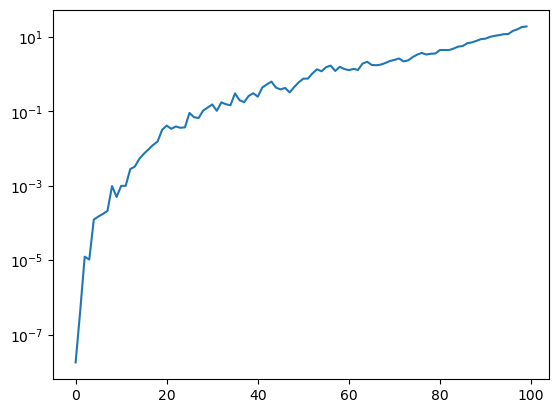

In [59]:
plt.plot(np.array(sorted(scipy_svd_out, reverse=True)) - np.abs(eigenvals[0]))
plt.yscale('log')

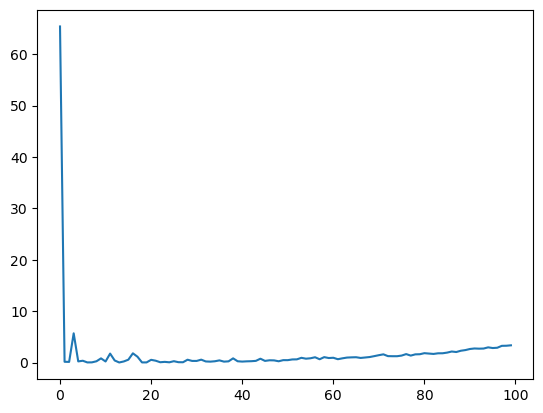

In [47]:
plt.plot(np.array(sorted(scipy_svd_out, reverse=True)) - S)